In [3]:
from cmcrameri import cm
from cmap import Colormap
import matplotlib.pyplot as plt
plt.rcParams.update({
    # LaTeX rendering and font configuration
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],  # mathpazo corresponds to Palatino font
    "font.size": 18,  # Base font size
    
    # Font sizes for specific elements
    "axes.titlesize": 30,        # Axis title
    "axes.labelsize": 30,         # Axis labels
    "xtick.labelsize": 24,        # X-ticks
    "ytick.labelsize": 24,        # Y-ticks
    "legend.fontsize": 24,        # Legend
    "figure.titlesize": 24,       # Figure title
    
    # LaTeX preamble packages
    "text.latex.preamble": r"""
        \usepackage{amsmath}
        \usepackage{amsfonts}
        \usepackage{amssymb}
        \usepackage{lmodern}
        \usepackage{mathpazo}
    """
})

lipari = cm.lipari
lajolla = cm.lajolla
bilbao = cm.bilbao

In [4]:
import sympy as sp

Delta, Delta1, Delta2, Omega, phi = sp.symbols('Delta Delta_1 Delta_2 Omega phi', real=True)

# Pauli matrices
sx = sp.Matrix([[0, 1], [1, 0]])
sy = sp.Matrix([[0, -sp.I], [sp.I, 0]])
sz = sp.Matrix([[1, 0], [0, -1]])
I2 = sp.eye(2)

# Spin operators
Sp = (sx + sp.I*sy) / 2
Sm = (sx - sp.I*sy) / 2

# Two-spin operators via Kronecker product
S1z = sp.kronecker_product(sz, I2)
S1x = sp.kronecker_product(sx, I2)
S1y = sp.kronecker_product(sy, I2)
S2z = sp.kronecker_product(I2, sz)
S2x = sp.kronecker_product(I2, sx)
S2y = sp.kronecker_product(I2, sy)
S1p = sp.kronecker_product(Sp, I2)
S2p = sp.kronecker_product(I2, Sp)
S1m = sp.kronecker_product(Sm, I2)
S2m = sp.kronecker_product(I2, Sm)
I4  = sp.eye(4)

# Effective Hamiltonian H
H = Delta * S1z + Delta*S2z + Omega * (S1p + sp.exp(sp.I*phi)*S2p + S1m + sp.exp(-sp.I*phi)*S2m)


L = S1m + sp.exp(-sp.I*phi)*S2m

# Strong symmetry generator U 
#U = sp.Rational(1, 2) * ( S1z * S2z+ 2 * sp.exp(sp.I*phi) * S1m * S2p+ 2 * sp.exp(-sp.I*phi) * S1p * S2m)

U = 1/2*(  S1z * S2z+   sp.exp(sp.I*phi) *  2*(S1x-sp.I*S1y)/2 * (S2x+sp.I*S2y)/2+  2*sp.exp(-sp.I*phi) * (S1x+sp.I*S1y)/2 * (S2x-sp.I*S2y)/2)

In [3]:
# Rotated spin operators for species B
S2x_tilde = S2x * sp.cos(phi) - S2y * sp.sin(phi)
S2y_tilde = S2x * sp.sin(phi) + S2y * sp.cos(phi)
S2z_tilde = S2z


U_new = (S1x *  S2x_tilde + S1y * S2y_tilde + S1z * S2z_tilde)

# Simplify the difference to check if they are equal
(U - U_new).simplify


comm = U_new * H - H * U_new

# Simplify using exponential to trigonometric conversion and advanced simplification
def deep_simplify(expr):
    expr = expr.rewrite(sp.sin).rewrite(sp.cos)
    expr = expr.expand()
    expr = sp.trigsimp(expr)
    expr = expr.simplify()
    return expr

# Apply deep simplification to each element of the commutator matrix
simplified_commutator = comm.applyfunc(deep_simplify)
simplified_commutator

Matrix([
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0]])

In [4]:
U_new.simplify()

Matrix([
[1,            0,             0, 0],
[0,           -1, 2*exp(-I*phi), 0],
[0, 2*exp(I*phi),            -1, 0],
[0,            0,             0, 1]])

In [5]:
U

Matrix([
[0.5,              0,               0,   0],
[  0,           -0.5, 1.0*exp(-I*phi),   0],
[  0, 1.0*exp(I*phi),            -0.5,   0],
[  0,              0,               0, 0.5]])

In [7]:
(U_new*H - H*U_new).simplify()

Matrix([
[                                                           0, 0,   2*Omega*(I*exp(I*phi)*sin(phi) - exp(I*phi)*cos(phi) + 1),                                                          0],
[-2*I*Omega*sin(phi) + 2*Omega*cos(phi) - 2*Omega*exp(-I*phi), 0,                                                           0, 2*Omega*(-I*exp(I*phi)*sin(phi) + exp(I*phi)*cos(phi) - 1)],
[                                                           0, 0,                                                           0,                                                          0],
[                                                           0, 0, 2*I*Omega*sin(phi) - 2*Omega*cos(phi) + 2*Omega*exp(-I*phi),                                                          0]])

In [6]:
# Print eigenvalues and eigenvectors of U
# Ueigs = U.eigenvals()
Uvecs = U.eigenvects()

In [8]:
plus = sp.Matrix([[1], [1]]) / sp.sqrt(2)
psi = sp.kronecker_product(plus, plus)
rho = psi * psi.H

In [166]:
Uvecs[1][2][1]

Matrix([
[          0],
[exp(-I*phi)],
[        1.0],
[          0]])

In [1163]:
#Compute overlaps
(Uvecs[0][2][0].H * rho * Uvecs[1][2][1]).simplify()

Matrix([[-I*sin(phi)/2]])

In [1020]:
vects = [vec for _, _, vec_list in Uvecs for vec in vec_list]
V = sp.Matrix.hstack(*vects)

D = V.inv() * U * V

In [162]:
V.inv() * H * V

Matrix([
[0,       0,                   0,                0],
[0, 2*Delta,             2*Omega,                0],
[0,   Omega,                   0, Omega*exp(I*phi)],
[0,       0, 2*Omega*exp(-I*phi),         -2*Delta]])

In [1150]:
# Separate +1 and -1 eigenspaces
plus_eigs = [vec for val, mult, vecs in Uvecs if sp.simplify(val - 1) == 0 for vec in vecs]
minus_eigs = [vec for val, mult, vecs in Uvecs if sp.simplify(val + 1) == 0 for vec in vecs]


def normalize(vec):
    norm = sp.sqrt((vec.H * vec)[0])
    return vec / norm

plus_vecs = [normalize(v) for v in plus_eigs]
minus_vecs = [normalize(v) for v in minus_eigs]

# Build coherences: |+><-|
B_ij = []
for i in range(len(plus_vecs)):
    for j in range(len(minus_vecs)):
        ket_plus = plus_vecs[i]
        ket_minus = minus_vecs[j]
        B = ket_plus * ket_minus.H  # |+><-|
        B_ij.append(B)

# Now define the Sx-polarized product state: |+> ⊗ |+>
plus1 = sp.Matrix([[1], [1]]) / sp.sqrt(2)
psi = sp.kronecker_product(plus1, plus1)
rho = psi * psi.H

# Compute overlaps C_{+-}^{ij} = Tr[B_ij^† rho]
def hs_inner(A, B):
    return sp.simplify(sp.Trace(A.H * B))

C_pm = []
for B in B_ij:
    coeff = hilbert_schmidt_inner(B, rho)
    C_pm.append(sp.simplify(coeff))

# Display results
for idx, coeff in enumerate(C_pm):
    print(f"C_+-[{idx}] = {coeff}")



C_+-[0] = sqrt(2)/8 - sqrt(2)*exp(-I*phi)/8
C_+-[1] = exp(I*phi)/8 - exp(-I*phi)/8
C_+-[2] = sqrt(2)/8 - sqrt(2)*exp(-I*phi)/8


In [163]:
eig_pairs = []
for val, mult, vecs in Uvecs:
    for vec in vecs:
        eig_pairs.append((val, vec))
eig_pairs.sort(key=lambda x: x[0], reverse=True)  # Order: [1, 1, 1, -1]

# Build unitary matrix V from eigenvectors
V = sp.Matrix.hstack(*[vec for _, vec in eig_pairs])
Vinv = V.inv()

# Verify diagonalization: D = Vinv * U * V
D = Vinv * U * V  

# Transform H and L to the V-basis
H_tilde = Vinv * H * V
L_tilde = Vinv * L * V

In [164]:
# Extract blocks for triplet and singlet sectors
H_plus = H_tilde[0:3, 0:3]   # Triplet block (3x3)
H_minus = H_tilde[3, 3]       # Singlet block (1x1 scalar)
L_plus = L_tilde[0:3, 0:3]    # Triplet block (3x3)
L_minus = L_tilde[3, 3]       # Singlet block (1x1 scalar)

In [165]:
H_tilde

Matrix([
[2*Delta,             2*Omega,                0, 0],
[  Omega,                   0, Omega*exp(I*phi), 0],
[      0, 2*Omega*exp(-I*phi),         -2*Delta, 0],
[      0,                   0,                0, 0]])

In [1086]:
rho = S1x + S2x
rho

Matrix([
[0, 1, 1, 0],
[1, 0, 0, 1],
[1, 0, 0, 1],
[0, 1, 1, 0]])

We define the projector onto the $\kappa$-th subspace as
$$ \Pi_\kappa = \sum_\mu|v_{\kappa, \mu}\rangle\langle v_{\kappa,\mu}|

In [ ]:
# Separate eigenvectors by eigenvalue
triplet_vecs = []  # For λ = +1
singlet_vecs = []   # For λ = -1

for val, mult, vecs in Uvecs:
    if val == 1:
        triplet_vecs = [vec.normalized() for vec in vecs]
    elif val == -1:
        singlet_vecs = [vec.normalized() for vec in vecs]

# Build projectors
Pi_plus = sp.zeros(4, 4)
for vec in triplet_vecs:
    Pi_plus += vec * vec.H  # Outer product

Pi_minus = sp.zeros(4, 4)
for vec in singlet_vecs:
    Pi_minus += vec * vec.H

# Define |++>_x state
plus_x = sp.Matrix([sp.I, -sp.I]) / sp.sqrt(2)
psi0 = sp.kronecker_product(plus_x, plus_x)
rho0 = psi0 * psi0.H  # Density matrix

# Compute weights 
w_plus = (Pi_plus @ rho0).trace().simplify()
w_minus = (Pi_minus @ rho0).trace().simplify()

print(f"Weight in triplet: {w_plus}")
print(f"Weight in singlet: {w_minus}")

Weight in triplet: cos(phi)/4 + 3/4
Weight in singlet: 1/4 - cos(phi)/4


Visualize relative weights for sampled points on bloch sphere

In [291]:

def init_rho(theta, psi):
    """
    Returns a 4x4 density matrix rho = (|ψ>⊗|ψ>)(<ψ|⊗<ψ|),
    where |ψ> = cos(theta/2)|0> + e^{i psi} sin(theta/2)|1>.
    """
    psi1 = np.array([np.cos(theta/2), np.exp(1j*psi)*np.sin(theta/2)], dtype=complex)
    psi2 = np.kron(psi1, psi1)
    return np.outer(psi2, psi2.conj())

# Parameters for Bloch grid
n_theta, n_psi = 100, 100
thetas = np.linspace(0, np.pi, n_theta)
psis   = np.linspace(0, 2*np.pi, n_psi)

# Precompute all density matrices
rhos = np.empty((n_theta, n_psi, 4, 4), dtype=complex)
for i, theta in enumerate(thetas):
    for j, psi in enumerate(psis):
        rhos[i, j] = init_rho(theta, psi)

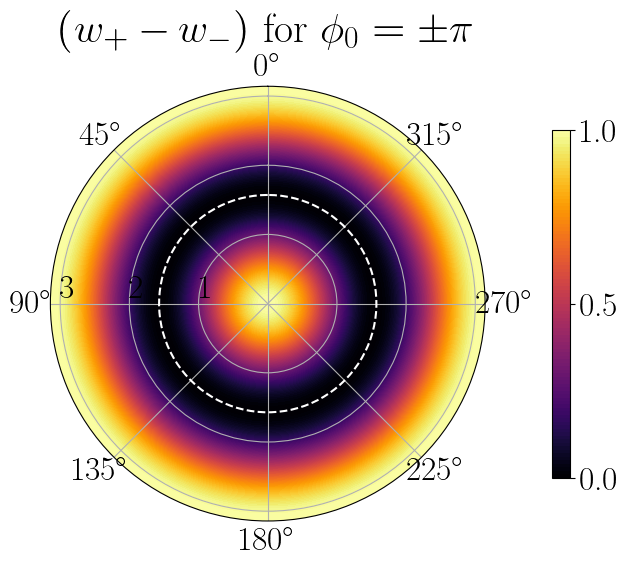

In [451]:
import numpy as np
import matplotlib.pyplot as plt

# Define Pauli matrices
I2 = np.eye(2)
sz = np.array([[1, 0], [0, -1]])
sp = np.array([[0, 1], [0, 0]])  # sigma-plus
sm = np.array([[0, 0], [1, 0]])  # sigma-minus

# Fixed parameters
phi0 = np.pi  # Phase for symmetry operator (try 0, pi/2, pi, etc.)
n_theta, n_psi = 100, 100
thetas = np.linspace(0, np.pi, n_theta)
psis = np.linspace(0, 2*np.pi, n_psi)

# Build symmetry operator U for given phi0
I4 = np.kron(I2, I2)
U = (0.5 * I4 + 
     0.5 * np.kron(sz, sz) + 
     np.exp(1j*phi0) * np.kron(sm, sp) + 
     np.exp(-1j*phi0) * np.kron(sp, sm))

# Diagonalize U to get projectors
eigvals, eigvecs = np.linalg.eigh(U)
tol = 1e-10
idx_plus = np.where(np.abs(eigvals - 1) < tol)[0]
idx_minus = np.where(np.abs(eigvals + 1) < tol)[0]

V_plus = eigvecs[:, idx_plus]
V_minus = eigvecs[:, idx_minus]
Pi_plus = V_plus @ V_plus.conj().T
Pi_minus = V_minus @ V_minus.conj().T

# Initialize weights arrays
weights_plus = np.zeros((n_theta, n_psi))
weights_minus = np.zeros((n_theta, n_psi))

# Compute weights for each initial state
for i, theta in enumerate(thetas):
    for j, psi in enumerate(psis):
        # Construct single-qubit state
        psi1 = np.array([
            np.cos(theta/2), 
            np.exp(1j*psi)*np.sin(theta/2)
        ])
        # Construct two-qubit state |ψ>⊗|ψ>
        psi2 = np.kron(psi1, psi1)
        rho = np.outer(psi2, psi2.conj())
        
        # Compute weights
        w_plus = np.trace(Pi_plus @ rho).real
        w_minus = np.trace(Pi_minus @ rho).real
        weights_plus[i, j] = w_plus
        weights_minus[i, j] = w_minus

ticks  = [0, 0.5, 1.0]

# Create plots
fig, ax = plt.subplots(1, 1, figsize=(14, 6), subplot_kw={'projection': 'polar'})

# Plot w_plus
c1 = ax.contourf(psis, thetas, weights_plus - weights_minus, 100, cmap='inferno')
ax.set_title(r'$w_+$ ')
ax.set_theta_zero_location("N")
ax.set_rlabel_position(90)
fig.colorbar(c1, ax=ax, shrink=0.8, ticks=ticks)

#Draw circle on equator
ax.plot(psis, np.full_like(psis, np.pi/2), color='white', linestyle='--', linewidth=1.5, label='Equator')
# ax.legend(loc='lower center')

plt.title(f'$(w_+ - w_-)$ for $\phi_0 = \pm\pi$')
plt.tight_layout()

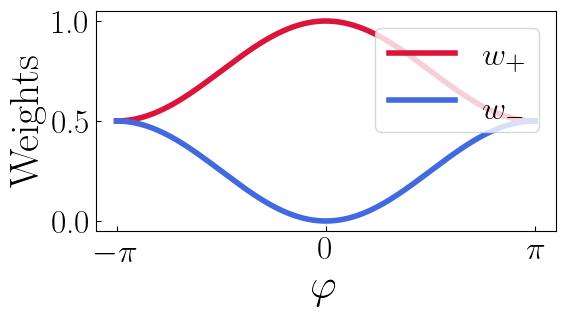

In [544]:
def getweights(phi0):
    w_plus = (3+np.cos(phi0))/4
    w_minus = (1-np.cos(phi0))/4
    return w_plus, w_minus

#Plot weights for all phi

phis = np.linspace(-1*np.pi, np.pi, 250)
fig, ax = plt.subplots(1,1, figsize=(6,3.5))
ax.plot(phis, getweights(phis)[0], label=r'$w_+$', lw=4, color='crimson')
ax.plot(phis, getweights(phis)[1], label=r'$w_-$', lw=4, color='royalblue')
ax.set_xlabel(r'$\varphi$')
ax.set_xticks([-np.pi, 0, np.pi], 
              [r'$-\pi$', r'$0$', r'$\pi$'])
ax.tick_params(axis="both",direction="in")
ax.set_ylabel(r'Weights')
ax.legend(loc='upper right')
plt.tight_layout()
plt.savefig('weights.pdf', bbox_inches='tight', dpi=300)

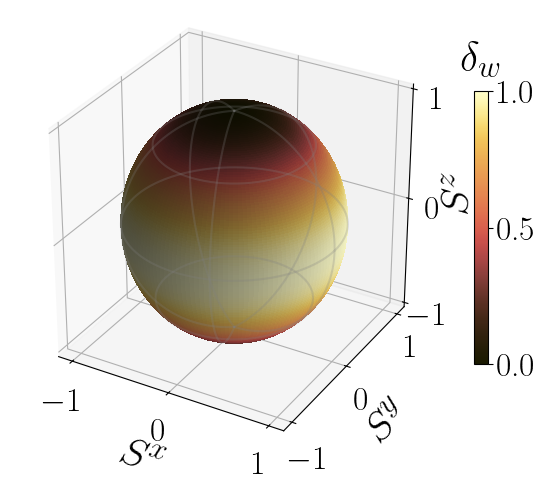

In [1188]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401

# --- PARAMETERS ---
phi0   = np.pi          # symmetry phase
n_th   = 150            # polar grid resolution
n_ps   = 150            # azimuthal grid resolution

# Pauli matrices & symmetry operator U
I2 = np.eye(2)
sz = np.array([[1,0],[0,-1]])
sp = np.array([[0,1],[0,0]])
sm = np.array([[0,0],[1,0]])
I4 = np.kron(I2, I2)
U  = (0.5*I4 + 0.5*np.kron(sz,sz) +
      np.exp(1j*phi0)*np.kron(sm,sp) +
      np.exp(-1j*phi0)*np.kron(sp,sm))

# Projectors onto ±1 eigenspaces
eigvals, eigvecs = np.linalg.eigh(U)
tol = 1e-10
Vp = eigvecs[:, np.where(np.abs(eigvals-1) < tol)[0]]
Vm = eigvecs[:, np.where(np.abs(eigvals+1) < tol)[0]]
Pp = Vp @ Vp.conj().T
Pm = Vm @ Vm.conj().T

# Bloch‐sphere grid
thetas = np.linspace(0, np.pi, n_th)
psis   = np.linspace(0, 2*np.pi, n_ps)
Theta, Psi = np.meshgrid(thetas, psis, indexing='ij')

# Compute weight difference on sphere
W = np.zeros_like(Theta)
for i, θ in enumerate(thetas):
    for j, φ in enumerate(psis):
        # single-qubit state |ψ>
        psi1 = np.array([np.cos(θ/2),
                         np.exp(1j*φ)*np.sin(θ/2)])
        # product state |ψ> ⊗ |ψ>
        rho2 = np.kron(psi1, psi1)
        ρ = np.outer(rho2, rho2.conj())
        w_p = np.trace(Pp @ ρ).real
        w_m = np.trace(Pm @ ρ).real
        W[i,j] = 1 - (w_p - w_m)

# Convert to 3D Cartesian for sphere
X = np.sin(Theta)*np.cos(Psi)
Y = np.sin(Theta)*np.sin(Psi)
Z = np.cos(Theta)

# Plot
fig = plt.figure(figsize=(6,6))
ax  = fig.add_subplot(111, projection='3d')

normW = (W - W.min())/(W.max() - W.min())
surf = ax.plot_surface(
    X, Y, Z,
    facecolors=lajolla(normW),
    rcount=n_th, ccount=n_ps, linewidth=0,        # no edge lines
    antialiased=False,  # turn off any aliasing artifacts
    edgecolor='none')    # explicitly disable edges)

# Parallels 
n_par = 5
for lat in np.linspace(-np.pi/2, np.pi/2, n_par):
    θp = np.pi/2 - lat
    φ_line = np.linspace(0, 2*np.pi, 400)
    x = np.sin(θp)*np.cos(φ_line)
    y = np.sin(θp)*np.sin(φ_line)
    z = np.cos(θp)
    ax.plot(x, y, z,
            color='grey',
            linewidth=1.5,
            alpha=0.25,
            zorder=3)

# Meridians 
n_mer = 5
for φ0 in np.linspace(0, 2*np.pi, n_mer, endpoint=False):
    θ_line = np.linspace(0, np.pi, 400)
    x = np.sin(θ_line)*np.cos(φ0)
    y = np.sin(θ_line)*np.sin(φ0)
    z = np.cos(θ_line)
    ax.plot(x, y, z,
            color='grey',
            linewidth=1.5,
            alpha=0.25,
            zorder=3)
ax.set_xticks([-1,0,1])
ax.set_yticks([-1,0,1])
ax.set_zticks([-1,0,1])



ax.set_xlabel(r'$S^x$', labelpad=10)
ax.set_ylabel(r'$S^y$', labelpad=10)
ax.set_zlabel(r'$S^z$', labelpad=3)



# colorbar
m = plt.cm.ScalarMappable(cmap=lajolla)
m.set_array(W)
cb = fig.colorbar(m, ax=ax, shrink=0.5)
cb.ax.set_title(r'$\delta_w$', pad=15)
# Set colorbar ticks
cb.set_ticks([0, 0.5, 1.0])
# aesthetics
ax.set_box_aspect([1,1,1])
# ax.axis('off')
plt.tight_layout()
plt.show()

fig.savefig('sensitivity.pdf', bbox_inches='tight', dpi=1000)


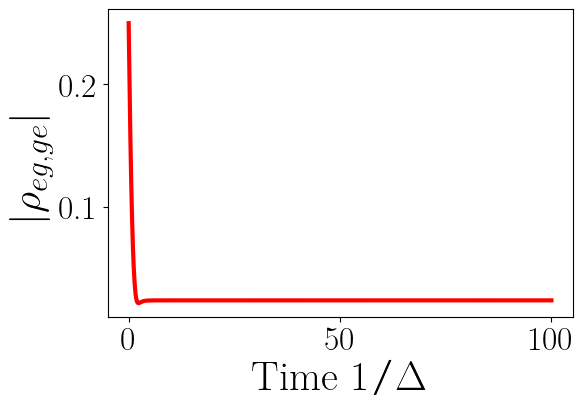

In [1045]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

# Parameters


g     = 0.1 
eta   = 0.5 * g


Delta = 0.01
Omega = 2 * g * eta 
phi = 1*np.pi/5
gamma = 1  

# Operators 
sx = sigmax(); sy = sigmay(); sz = sigmaz()
S1z = tensor(sz, qeye(2))
S2z = tensor(qeye(2), sz)
S1p = tensor(sigmap(), qeye(2))
S2p = tensor(qeye(2), sigmap())
S1m = tensor(sigmam(), qeye(2))
S2m = tensor(qeye(2), sigmam())

# Hamiltonian
H = Delta*(S1z + S2z) + Omega*(S1p + np.exp(1j*phi)*S2p + S1m + np.exp(-1j*phi)*S2m)

# Jump operators
L = S1m + np.exp(-1j*phi)*S2m

# Initial state with coherence: |eg> + |ge>
plus = (basis(2,0) + basis(2,1)).unit()
psi0 = tensor(plus, plus)
rho0 = ket2dm(psi0)

# Lindblad master equation
times = np.linspace(0, 1/Delta, 500)
result = mesolve(H, rho0, times, [np.sqrt(gamma)*L], [])

# Extract off-diagonal element
coherence = np.zeros(len(times))
phase = np.zeros(len(times))
for i, rho in enumerate(result.states):
    coherence[i] = abs(rho[1,2])  # |eg><ge| element
    phase[i] = np.angle(rho[1,2])  # Phase of it

# Plot
plt.figure(figsize=(6,4))
plt.plot(times, coherence, 'r-', linewidth=3)
# plt.plot(times, phase, 'b-', lw=3)
plt.xlabel(r'Time $1/\mathrm{\Delta}$')
plt.ylabel(r'$|\rho_{eg,ge}|$')
# plt.xticks([0, 250, 500, 750, 1000],[0, 25, 50, 75, 100])
# plt.yticks([0,0.25,0.5])
# plt.ylim(-0.05,0.6)
plt.show()

In [994]:
U  = 0.5*tensor(qeye(2), qeye(2)) + 0.5*S1z*S2z + np.exp(1j*phi)*S1m*S2p + np.exp(-1j*phi)*S1p*S2m
# Eigenvectors

eigvals, eigvecs = U.eigenstates()
tol= 1e-10
Vp = [v for λ,v in zip(eigvals,eigvecs) if abs(λ-1)<tol]
Vm = [v for λ,v in zip(eigvals,eigvecs) if abs(λ+1)<tol]

Pp = sum(ket2dm(v) for v in Vp)
Pm = sum(ket2dm(v) for v in Vm)

In [995]:
w_p = (Pp * rho0).tr()
w_m = (Pm * rho0).tr()
deltaw = 1 - (w_p - w_m)

Analytical steady state

Analytic steady state coherence (Re): -0.0193
Simulated final coherence (Re): 0.0238
Analytic phase: -2.5133 rad
Simulated phase: 2.4651 rad


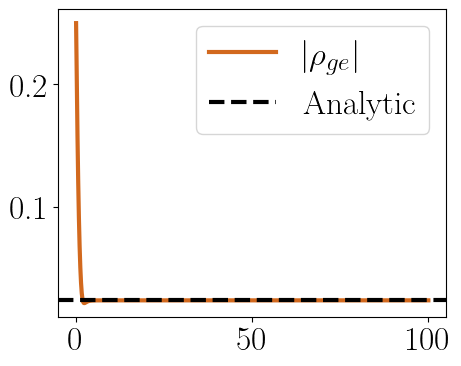

In [1012]:
# Analytical steady-state coherence
def analytic_steady_coherence(phi):
    return -np.exp(1j*phi) * (1 - np.cos(phi)) / 8

# After your simulation
phi_test = phi
analytic = analytic_steady_coherence(phi_test)

print(f"Analytic steady state coherence (Re): {analytic.real:.4f}")
print(f"Simulated final coherence (Re): {coherence[-1]:.4f}")
print(f"Analytic phase: {np.angle(analytic):.4f} rad")
print(f"Simulated phase: {phase[-1]:.4f} rad")

# Plot analytic and simulated matrix elements and phase in single plot


plt.figure(figsize=(5, 4))
plt.plot(times, coherence, 'chocolate', label=r'$|\rho_{ge}|$', lw=3)
plt.axhline(y=np.abs(analytic), color='black', linestyle='--', lw=3,label='Analytic')
plt.legend()




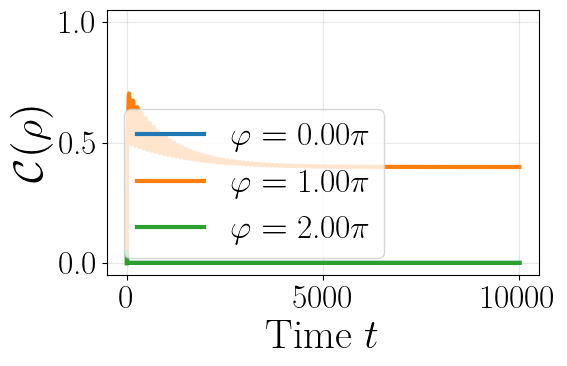

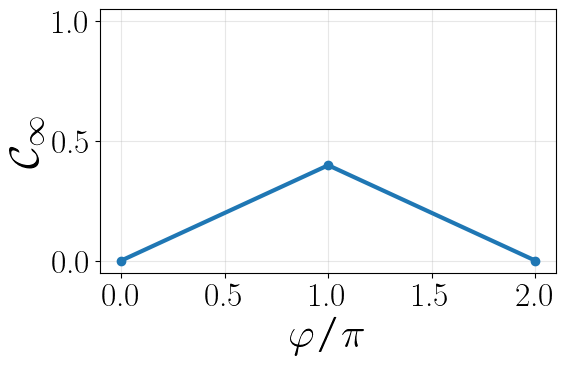

In [1214]:
# Parameters
g = 0.1 
eta = 1 * g
Delta = 0.01
Omega = 2 * g * eta 
gamma = 1  
phi_values = np.linspace(0, 2*np.pi, 3)  # Multiple phase values
times = np.linspace(0, 10000, 10000)

# Basis states: |g> = [1,0], |e> = [0,1]
plus = (basis(2,0) + basis(2,1)).unit()  # |+x> state

# Initialize storage
results = []
concurrences = np.zeros((len(phi_values), len(times)))

# Operators 
sx = sigmax(); sy = sigmay(); sz = sigmaz()
S1z = tensor(sz, qeye(2))
S2z = tensor(qeye(2), sz)
S1p = tensor(sigmap(), qeye(2))
S2p = tensor(qeye(2), sigmap())
S1m = tensor(sigmam(), qeye(2))
S2m = tensor(qeye(2), sigmam())
S1x = tensor(sx, qeye(2))  # For Hamiltonian
S2x = tensor(qeye(2), sx)  # For Hamiltonian

for i, phi in enumerate(phi_values):
    # Hamiltonian 
    H = Delta*(S1z + S2z) + Omega*(S1x + S2x)
    
    # Jump operator 
    L = S1m + np.exp(-1j*phi)*S2m
    
    # Initial state: |+x> ⊗ |+x>
    psi0 = tensor(plus, plus)
    rho0 = ket2dm(psi0)
    
    # Solve Lindblad master equation
    result = mesolve(H, rho0, times, [np.sqrt(gamma)*L], [])
    results.append(result)
    
    # Calculate concurrence (entanglement measure)
    for j, rho in enumerate(result.states):
        concurrences[i,j] = concurrence(rho)

# Visualization
plt.figure(figsize=(6, 4))

for i, phi in enumerate(phi_values):
    plt.plot(times, concurrences[i], label=rf'$\varphi = {phi/np.pi:.2f}\pi$', lw=3)

plt.xlabel(r'Time $t$')
plt.ylabel(r'$\mathcal{C}(\rho)$')
plt.legend()
plt.grid(alpha=0.3)
plt.ylim(-0.05, 1.05)
plt.tight_layout()
plt.show()

# Steady-state entanglement vs phase
steady_entanglement = [concurrences[i,-1] for i in range(len(phi_values))]

plt.figure(figsize=(6, 4))
plt.plot(phi_values/np.pi, steady_entanglement, 'o-', linewidth=3)
plt.xlabel(r'$\varphi/\pi$')
plt.ylabel(r'$\mathcal{C}_{\infty}$')
plt.xticks([0, 0.5, 1.0, 1.5, 2.0])
plt.grid(alpha=0.3)
plt.ylim(-0.05, 1.05)
plt.tight_layout()
plt.show()

Automatic strong symmetry finder

In [5]:
Cm = sp.symbols('C')

# Two-spin operators via Kronecker product
S1z = sp.kronecker_product(sz, I2)
S1x = sp.kronecker_product(sx, I2)
S1y = sp.kronecker_product(sy, I2)
S2z = sp.kronecker_product(I2, sz)
S2x = sp.kronecker_product(I2, sx)
S2y = sp.kronecker_product(I2, sy)
S1p = sp.kronecker_product(Sp, I2)
S2p = sp.kronecker_product(I2, Sp)
S1m = sp.kronecker_product(Sm, I2)
S2m = sp.kronecker_product(I2, Sm)
I4  = sp.eye(4)

H = Delta/2 * S1z + Delta/2*S2z + Omega * (S1p + sp.exp(sp.I*phi)*S2p + S1m + sp.exp(-sp.I*phi)*S2m) + Cm/2 * (S1p*S1m + S2p*S2m + S1p*S2m*sp.exp(-sp.I*phi) + S2p*S1m*sp.exp(sp.I*phi))

L = S1m + sp.exp(-sp.I*phi)*S2m

In [6]:
H

Matrix([
[        C + Delta, Omega*exp(I*phi),             Omega,                0],
[Omega*exp(-I*phi),              C/2,   C*exp(-I*phi)/2,            Omega],
[            Omega,   C*exp(I*phi)/2,               C/2, Omega*exp(I*phi)],
[                0,            Omega, Omega*exp(-I*phi),           -Delta]])

In [7]:
x = sp.symbols('x00:16')  # x00..x15
X = sp.Matrix([[x[0], x[1], x[2], x[3]],
               [x[4], x[5],x[6], x[7]],
               [x[8], x[9], x[10], x[11]], 
               [x[12], x[13], x[14], x[15]]])

# Constraints: [X,H] = 0 and [X,L] = 0
comm_H = sp.simplify(X*H - H*X)
comm_L = sp.simplify(X*L - L*X)

# Flatten constraints to a list of scalar equations
eqs = list(comm_H)
eqs.extend(list(comm_L))
A, b = sp.linear_eq_to_matrix(eqs, list(x))

# Compute nullspace of A (solutions for vec(x))
ns = A.nullspace()


# Turn each nullspace vector into a 3x3 matrix and simplify
basis_matrices = []
for idx, v in enumerate(ns):
    M = sp.Matrix(4,4, list(v))   # shape into 3x3
    M = sp.simplify(M)
    basis_matrices.append(M)



I = sp.eye(4)
B = None
for M in basis_matrices:
    if sp.simplify(M - I) == sp.zeros(3):
        # this is the identity basis
        continue
    else:
        # choose the first non-identity as B (if there is one)
        if B is None:
            B = M
B

Matrix([
[0,           0,            0, 0],
[0,           1, -exp(-I*phi), 0],
[0, -exp(I*phi),            1, 0],
[0,           0,            0, 0]])

In [173]:
(B+sp.eye(4))*-2 * H - H*(B+sp.eye(4))*-2

Matrix([
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0]])

In [ ]:
# Strong symmetry generator eigenvectors (akin to Ang. Momentum eigenstates)

B.eigenvects()

[(0,
  3,
  [Matrix([
   [1],
   [0],
   [0],
   [0]]),
   Matrix([
   [          0],
   [exp(-I*phi)],
   [          1],
   [          0]]),
   Matrix([
   [0],
   [0],
   [0],
   [1]])]),
 (2,
  1,
  [Matrix([
   [           0],
   [-exp(-I*phi)],
   [           1],
   [           0]])])]

### 3 level system below

In [59]:
# Kets (column vectors) in the basis |0>,|1>,|2>
ket0 = sp.Matrix([1, 0, 0])
ket1 = sp.Matrix([0, 1, 0])
ket2 = sp.Matrix([0, 0, 1])

# Bras (conjugate transpose of the kets)
bra0 = ket0.conjugate().T
bra1 = ket1.conjugate().T
bra2 = ket2.conjugate().T

# Projectors and transitions
P1 = ket1 * bra1   # |1><1|
P2 = ket2 * bra2   # |2><2|
T01 = ket0 * bra1  # |0><1|
T02 = ket0 * bra2  # |0><2|

# Hamiltonian 
H = sp.simplify(Delta * P1 + Delta * P2 +  Omega * T01 + Omega * sp.exp(-sp.I*phi) * T02 + ( Omega * T01 + Omega * sp.exp(-sp.I*phi) * T02).conjugate().T + Cm/2 * (T01.conjugate()*T01 + T01.conjugate()*T02*sp.exp(-sp.I*phi)+ T02.conjugate()*T01*sp.exp(sp.I*phi) + T02.conjugate()*T02)) 

L = sp.simplify(T01 + sp.exp(-sp.I*phi) * T02)

In [ ]:
ket0 = sp.Matrix([1,0,0]); ket1 = sp.Matrix([0,1,0]); ket2 = sp.Matrix([0,0,1])
bra0 = ket0.conjugate().T; bra1 = ket1.conjugate().T; bra2 = ket2.conjugate().T


P1 = ket1*bra1    # |1><1|
P2 = ket2*bra2    # |2><2|
T01 = ket0*bra1   # |0><1|
T02 = ket0*bra2   # |0><2|
T10 = ket1*bra0   # |1><0|
T20 = ket2*bra0   # |2><0|

# # Hamiltonian 
H = sp.simplify(Delta * P1 + Delta * P2
             + Omega * T01 + Omega * sp.exp(-sp.I*phi) * T02
             + Omega * T10 + Omega * sp.exp(sp.I*phi) * T20)

L = sp.simplify(T01 + sp.exp(-sp.I*phi) * T02)

# Unknown operator X with 9 symbolic entries
x = sp.symbols('x00:09')  # x00..x08
X = sp.Matrix([[x[0], x[1], x[2]],
               [x[3], x[4], x[5]],
               [x[6], x[7], x[8]]])

# Constraints: [X,H] = 0 and [X,L] = 0
comm_H = sp.simplify(X*H - H*X)
comm_L = sp.simplify(X*L - L*X)

# Flatten constraints to a list of scalar equations
eqs = list(comm_H)
eqs.extend(list(comm_L))
A, b = sp.linear_eq_to_matrix(eqs, list(x))

# Compute nullspace of A (solutions for vec(x))
ns = A.nullspace()

# print("A matrix rank:", A.rank())
# print("Dimension of nullspace:", len(ns))
# print()

# Turn each nullspace vector into a 3x3 matrix and simplify
basis_matrices = []
for idx, v in enumerate(ns):
    M = sp.Matrix(3,3, list(v))   # shape into 3x3
    M = sp.simplify(M)
    basis_matrices.append(M)
    # print(f"Basis matrix #{idx+1}:")
    # sp.pprint(M)
    # print()

# Identify common-case ordering (one basis vector is identity)
# Find identity-like vector if present
I = sp.eye(3)
B = None
for M in basis_matrices:
    if sp.simplify(M - I) == sp.zeros(3):
        # this is the identity basis
        continue
    else:
        # choose the first non-identity as B (if there is one)
        if B is None:
            B = M
B

Matrix([
[exp(-I*phi), 0,             0],
[          0, 0, exp(-2*I*phi)],
[          0, 1,             0]])

In [5]:
Bn = B * sp.exp(sp.I*phi) 

In [6]:
Bn.eigenvects()

[(-1,
  1,
  [Matrix([
   [           0],
   [-exp(-I*phi)],
   [           1]])]),
 (1,
  2,
  [Matrix([
   [1],
   [0],
   [0]]),
   Matrix([
   [          0],
   [exp(-I*phi)],
   [          1]])])]

In [8]:
(Bn.eigenvects()[0][2][0] * Bn.eigenvects()[0][2][0].T) 

Matrix([
[0,             0,            0],
[0, exp(-2*I*phi), -exp(-I*phi)],
[0,  -exp(-I*phi),            1]])

In [9]:
# Nornmalize new matrix 
Mmax = sp.Matrix([[0.5,0, 0],[0,0.5, 0], [0,0, 0]])
Mmax = Mmax / Mmax.trace()

In [10]:
Mmax

Matrix([
[0.5,   0, 0],
[  0, 0.5, 0],
[  0,   0, 0]])

In [11]:
Bn.eigenvects()[1][2]

[Matrix([
 [1],
 [0],
 [0]]),
 Matrix([
 [          0],
 [exp(-I*phi)],
 [          1]])]

In [12]:
(H * Mmax)

Matrix([
[                   0, 0.5*Omega, 0],
[           0.5*Omega, 0.5*Delta, 0],
[0.5*Omega*exp(I*phi),         0, 0]])

In the strong symmetry eigenbasis we perform the block diagonalization of the Liouvillian

In [252]:

# bare kets (column vectors)
ket0 = sp.Matrix([1,0,0])
ket1 = sp.Matrix([0,1,0])
ket2 = sp.Matrix([0,0,1])

# bras
bra0 = ket0.conjugate().T
bra1 = ket1.conjugate().T
bra2 = ket2.conjugate().T

# projectors and transitions (bare basis)
P1 = ket1 * bra1    # |1><1|
P2 = ket2 * bra2    # |2><2|
T01 = ket0 * bra1   # |0><1|
T02 = ket0 * bra2   # |0><2|
T10 = ket1 * bra0   # |1><0|
T20 = ket2 * bra0   # |2><0|

# phi = 0 case: exp(i phi) = 1
H = sp.simplify(Delta * P1 + Delta * P2
                + Omega * T01 + Omega * T02
                + Omega * T10 + Omega * T20)

L = sp.simplify(T01 + T02)   # since phi = 0

# New basis vectors (columns of U)
e0p   = ket0
eplus = (ket1 + ket2) / sp.sqrt(2)
eminus= (ket1 - ket2) / sp.sqrt(2)

# Build unitary U whose columns are the new basis (in original ordering)
U = sp.Matrix.hstack(e0p, eplus, eminus)

# Transform operators to new basis: O' = U^\dagger O U
Udag = U.conjugate().T
Hp = sp.simplify(Udag * H * U)
Lp = sp.simplify(Udag * L * U)


In [253]:
Hp

Matrix([
[            0, sqrt(2)*Omega,     0],
[sqrt(2)*Omega,         Delta,     0],
[            0,             0, Delta]])

In [254]:
Lp

Matrix([
[0, sqrt(2), 0],
[0,       0, 0],
[0,       0, 0]])

In [49]:
gamma = sp.symbols('Gamma', real=True, positive=True)   # decay rate

# --- Lindblad map on a symbolic rho (3x3) ---
r11,r12,r13,r21,r22,r23,r31,r32,r33 = sp.symbols(
    'r11 r12 r13 r21 r22 r23 r31 r32 r33'
)
rho = sp.Matrix([[r11,r12,r13],
                 [r21,r22,r23],
                 [r31,r32,r33]])

comm = -1j * (Hp * rho - rho * Hp)
diss = gamma * (Lp * rho * Lp.H - sp.Rational(1,2) * (Lp.H * Lp * rho + rho * Lp.H * Lp))
Lindblad_map = sp.simplify(comm + diss)   # 3x3 matrix expression 

# --- Vectorized Liouvillian (column-major vec) ---
Id = sp.eye(n)
# -i[H, .] -> -i*(I ⊗ H - H.T ⊗ I)
Ham_super = -1j * (sp.kronecker_product(Id, Hp) - sp.kronecker_product(Hp.T, Id))

# vec(L rho L^†) = ( (L^†).T ⊗ L ) vec(rho) = (L.conjugate() ⊗ L) vec(rho)
L_term = sp.kronecker_product(Lp.conjugate(), Lp)
LdL = (Lp.H * Lp)
Diss_super = gamma * ( L_term
                      - sp.Rational(1,2) * ( sp.kronecker_product(Id, LdL)
                                            + sp.kronecker_product(LdL.T, Id) ) )

Liouv = sp.simplify(Ham_super + Diss_super)   # 9x9

# --- Sanity check: Liouv * vec(rho) == vec(Lindblad_map) ---
vec_rho = sp.Matrix([r11, r21, r31, r12, r22, r32, r13, r23, r33])  # column-major vec
vec_map_colmaj = sp.Matrix([
    Lindblad_map[0,0], Lindblad_map[1,0], Lindblad_map[2,0],
    Lindblad_map[0,1], Lindblad_map[1,1], Lindblad_map[2,1],
    Lindblad_map[0,2], Lindblad_map[1,2], Lindblad_map[2,2]
])

check = sp.simplify(Liouv * vec_rho - vec_map_colmaj)

In [156]:
# Replace Delta with 0
Liouv0 = Liouv.subs(Delta, 0)
Liouv0


Matrix([
[                   0, -1.0*sqrt(2)*I*Omega,                   0,  1.0*sqrt(2)*I*Omega,              2*Gamma,                   0,                    0,                    0, 0],
[-1.0*sqrt(2)*I*Omega,               -Gamma,                   0,                    0,  1.0*sqrt(2)*I*Omega,                   0,                    0,                    0, 0],
[                   0,                    0,                   0,                    0,                    0, 1.0*sqrt(2)*I*Omega,                    0,                    0, 0],
[ 1.0*sqrt(2)*I*Omega,                    0,                   0,               -Gamma, -1.0*sqrt(2)*I*Omega,                   0,                    0,                    0, 0],
[                   0,  1.0*sqrt(2)*I*Omega,                   0, -1.0*sqrt(2)*I*Omega,             -2*Gamma,                   0,                    0,                    0, 0],
[                   0,                    0, 1.0*sqrt(2)*I*Omega,                    0,         

In [106]:
(sp.sqrt(2)*2)**2

8

In [109]:
sp.simplify(Liouv0.eigenvals())

{0: 2, -1.0*Gamma: 1, -1.5*Gamma - 2.82842712474619*sqrt(0.03125*Gamma**2 - 1.0*Omega**2): 1, -1.5*Gamma + 2.82842712474619*sqrt(0.03125*Gamma**2 - 1.0*Omega**2): 1, -0.5*Gamma - 1.4142135623731*sqrt(0.125*Gamma**2 - 1.0*Omega**2): 2, -0.5*Gamma + 1.4142135623731*sqrt(0.125*Gamma**2 - 1.0*Omega**2): 2}

In [279]:
Liouv0.eigenvects()[5][0]

-0.5*Gamma + 0.5*(Gamma**2 - 8.0*Omega**2)**0.5

In [282]:
sp.Matrix(3,3, list(Liouv0.eigenvects()[5][2][1]))

Matrix([
[                                                                0,   0, 0],
[                                                                0,   0, 0],
[2.82842712474619*I*Omega/(Gamma - (Gamma**2 - 8.0*Omega**2)**0.5), 1.0, 0]])

In [161]:
rho_D = sp.Matrix(Liouv0.eigenvects()[0][2][0]) 

In [146]:
# Convert back to 3x3 matrix

rho_D = sp.Matrix(3,3, list(rho_D))
rho_Dn = rho_D / rho_D.trace()
rho_Dn

Matrix([
[    (0.5*Gamma**2/Omega**2 + 1.0)/(0.5*Gamma**2/Omega**2 + 2.0), -0.707106781186548*I*Gamma/(Omega*(0.5*Gamma**2/Omega**2 + 2.0)), 0],
[0.707106781186548*I*Gamma/(Omega*(0.5*Gamma**2/Omega**2 + 2.0)),                                1.0/(0.5*Gamma**2/Omega**2 + 2.0), 0],
[                                                              0,                                                                0, 0]])

In [149]:
sp.simplify(rho_Dn.eigenvals())

{0: 1, -Gamma*sqrt(1.0*Gamma**6 + 16.0*Gamma**4*Omega**2 + 80.0*Gamma**2*Omega**4 + 128.0*Omega**6)/(2.0*Gamma**4 + 16.0*Gamma**2*Omega**2 + 32.0*Omega**4) + 0.5: 1, Gamma*sqrt(1.0*Gamma**6 + 16.0*Gamma**4*Omega**2 + 80.0*Gamma**2*Omega**4 + 128.0*Omega**6)/(2.0*Gamma**4 + 16.0*Gamma**2*Omega**2 + 32.0*Omega**4) + 0.5: 1}

In [154]:
rho_Dn.eigenvals()

{-Gamma*sqrt(1.0*Gamma**6 + 16.0*Gamma**4*Omega**2 + 80.0*Gamma**2*Omega**4 + 128.0*Omega**6)/(2.0*Gamma**4 + 16.0*Gamma**2*Omega**2 + 32.0*Omega**4) + 0.5: 1,
 Gamma*sqrt(1.0*Gamma**6 + 16.0*Gamma**4*Omega**2 + 80.0*Gamma**2*Omega**4 + 128.0*Omega**6)/(2.0*Gamma**4 + 16.0*Gamma**2*Omega**2 + 32.0*Omega**4) + 0.5: 1,
 0: 1}

In [44]:
# Stack into column-major vec
m_0 = sp.Matrix([1,0,0,0,0,0,0,0,0])
m_bright= sp.Matrix([0,0,0,0,1,0,0,0,0])
m_dark = sp.Matrix([0,0,0,0,0,0,0,0,1])

In [ ]:
Liouv*Liouv*m_bright

Matrix([
[1],
[0],
[0],
[0],
[0],
[0],
[0],
[0],
[0]])

FInd the left and right eigenvectors of Liov0

In [309]:
Liouv0

Matrix([
[                   0, -1.0*sqrt(2)*I*Omega,                   0,  1.0*sqrt(2)*I*Omega,              2*Gamma,                   0,                    0,                    0, 0],
[-1.0*sqrt(2)*I*Omega,               -Gamma,                   0,                    0,  1.0*sqrt(2)*I*Omega,                   0,                    0,                    0, 0],
[                   0,                    0,                   0,                    0,                    0, 1.0*sqrt(2)*I*Omega,                    0,                    0, 0],
[ 1.0*sqrt(2)*I*Omega,                    0,                   0,               -Gamma, -1.0*sqrt(2)*I*Omega,                   0,                    0,                    0, 0],
[                   0,  1.0*sqrt(2)*I*Omega,                   0, -1.0*sqrt(2)*I*Omega,             -2*Gamma,                   0,                    0,                    0, 0],
[                   0,                    0, 1.0*sqrt(2)*I*Omega,                    0,         

In [485]:
R_eig = Liouv0.eigenvects()
L_eig = Liouv0.H.eigenvects()

In [286]:
sp.Matrix(3,3, list(L_eig[0][2][1]))

Matrix([
[0, 0,   0],
[0, 0,   0],
[0, 0, 1.0]])

In [76]:
R_eig

[(0,
  2,
  [Matrix([
   [-0.5*(-Gamma**2 - 2.0*Omega**2)/Omega**2],
   [        -0.707106781186548*I*Gamma/Omega],
   [                                       0],
   [         0.707106781186548*I*Gamma/Omega],
   [                                     1.0],
   [                                       0],
   [                                       0],
   [                                       0],
   [                                       0]]),
   Matrix([
   [  0],
   [  0],
   [  0],
   [  0],
   [  0],
   [  0],
   [  0],
   [  0],
   [1.0]])]),
 (-Gamma,
  1,
  [Matrix([
   [  0],
   [1.0],
   [  0],
   [1.0],
   [  0],
   [  0],
   [  0],
   [  0],
   [  0]])]),
 (-1.5*Gamma - 0.5*(Gamma**2 - 32.0*Omega**2)**0.5,
  1,
  [Matrix([
   [                                                                                                                                                                                                                                                             

In [314]:
sp.Matrix(3,3, list(R_eig[5][2][1]))

Matrix([
[                                                                0,   0, 0],
[                                                                0,   0, 0],
[2.82842712474619*I*Omega/(Gamma - (Gamma**2 - 8.0*Omega**2)**0.5), 1.0, 0]])

In [317]:
L_eig[5][2][1].T * R_eig[4][2][1]

Matrix([[8.0*Omega**2/((Gamma - (Gamma**2 - 8.0*Omega**2)**0.5)*(Gamma + (Gamma**2 - 8.0*Omega**2)**0.5)) + 1.0]])

In [97]:
Liouv0 

Matrix([
[                   0, -1.0*sqrt(2)*I*Omega,                   0,  1.0*sqrt(2)*I*Omega,              2*Gamma,                   0,                    0,                    0, 0],
[-1.0*sqrt(2)*I*Omega,               -Gamma,                   0,                    0,  1.0*sqrt(2)*I*Omega,                   0,                    0,                    0, 0],
[                   0,                    0,                   0,                    0,                    0, 1.0*sqrt(2)*I*Omega,                    0,                    0, 0],
[ 1.0*sqrt(2)*I*Omega,                    0,                   0,               -Gamma, -1.0*sqrt(2)*I*Omega,                   0,                    0,                    0, 0],
[                   0,  1.0*sqrt(2)*I*Omega,                   0, -1.0*sqrt(2)*I*Omega,             -2*Gamma,                   0,                    0,                    0, 0],
[                   0,                    0, 1.0*sqrt(2)*I*Omega,                    0,         

# Root finding

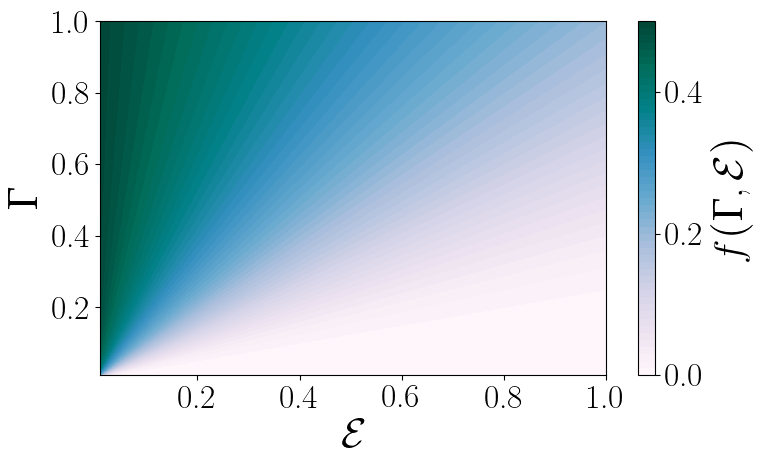

In [ ]:
import matplotlib.pyplot as plt

# Define the function
def f(Gamma, Omega):
    numerator = -Gamma * np.sqrt(Gamma**6 + 16*Gamma**4*Omega**2 + 80*Gamma**2*Omega**4 + 128*Omega**6)
    denominator = 2*Gamma**4 + 16*Gamma**2*Omega**2 + 32*Omega**4
    return numerator/denominator + 0.5

# Create a grid of values
Omega_vals = np.linspace(0.01, 1, 1000)
Gamma_vals = np.linspace(0.01, 1, 1000)  # Start from 0.01 to avoid division by zero

X, Y = np.meshgrid(Omega_vals, Gamma_vals)
Z = f(X, Y)



# Create contour plot
plt.figure(figsize=(8, 5))
contour = plt.contourf(X, Y, Z, levels=50, cmap='PuBuGn')
cbar = plt.colorbar(contour, label=r'$f(\Gamma,\mathcal{E})$')
cbar.set_ticks([0, 0.2,0.4])  # Set custom ticks
#
plt.contour(X, Y, Z, levels=[0], colors='black', linewidths=2, )
# Add labels and title
plt.ylabel(r'$\Gamma$')
plt.xlabel(r'$\mathcal{E}$')


# Show plot
plt.tight_layout()
plt.show()

## Liouvillian eigenspace initial state overlap evaluation

In [553]:
# Assuming L_eig is your list of eigenvectors
# Format: L_eig = [(eigenvalue1, multiplicity1, [vector1, ...]), ...]

display(Markdown("## All Eigenvectors $L_k$"))

for k, (eigenval, mult, eigenvectors) in enumerate(L_eig):
    display(Markdown(f"##### Eigenvalue {k}: $\lambda$ = {sp.pretty(eigenval)}, Multiplicity: {mult}"))
    
    for i, vec in enumerate(eigenvectors):
        # Reshape the 9x1 vector to a 3x3 matrix (column-major order)
        L_matrix = sp.Matrix(3, 3, lambda i, j: vec[3*j + i, 0])
        
        display(Markdown(f"##### Eigenvector {i} for eigenvalue {k} (L_{k}_{i})"))
        display(sp.simplify(L_matrix))



## All Eigenvectors $L_k$

##### Eigenvalue 0: $\lambda$ = 0, Multiplicity: 2

##### Eigenvector 0 for eigenvalue 0 (L_0_0)

Matrix([
[1.0,   0, 0],
[  0, 1.0, 0],
[  0,   0, 0]])

##### Eigenvector 1 for eigenvalue 0 (L_0_1)

Matrix([
[0, 0,   0],
[0, 0,   0],
[0, 0, 1.0]])

##### Eigenvalue 1: $\lambda$ = -Γ, Multiplicity: 1

##### Eigenvector 0 for eigenvalue 1 (L_1_0)

Matrix([
[  0, 1.0, 0],
[1.0,   0, 0],
[  0,   0, 0]])

##### Eigenvalue 2: $\lambda$ =                            0.5
             ⎛ 2         2⎞   
-1.5⋅Γ - 0.5⋅⎝Γ  - 32.0⋅Ω ⎠   , Multiplicity: 1

##### Eigenvector 0 for eigenvalue 2 (L_2_0)

Matrix([
[                                                                                    Omega**2*(2.0*Gamma**3 + 2.0*Gamma**2*(Gamma**2 - 32.0*Omega**2)**0.5 - 34.0*Gamma*Omega**2 - 2.0*Omega**2*(Gamma**2 - 32.0*Omega**2)**0.5)/(Gamma**5 + Gamma**4*(Gamma**2 - 32.0*Omega**2)**0.5 - 27.0*Gamma**3*Omega**2 - 11.0*Gamma**2*Omega**2*(Gamma**2 - 32.0*Omega**2)**0.5 + 50.0*Gamma*Omega**4 + 2.0*Omega**4*(Gamma**2 - 32.0*Omega**2)**0.5), I*Omega*(-1.4142135623731*Gamma**2 - 1.4142135623731*Gamma*(Gamma**2 - 32.0*Omega**2)**0.5 + 11.3137084989848*Omega**2)/(Gamma**3 + Gamma**2*(Gamma**2 - 32.0*Omega**2)**0.5 - 18.0*Gamma*Omega**2 - 2.0*Omega**2*(Gamma**2 - 32.0*Omega**2)**0.5), 0],
[I*Omega*(1.4142135623731*Gamma**4 + 1.4142135623731*Gamma**3*(Gamma**2 - 32.0*Omega**2)**0.5 - 29.698484809835*Gamma**2*Omega**2 - 7.07106781186548*Gamma*Omega**2*(Gamma**2 - 32.0*Omega**2)**0.5 + 11.3137084989848*Omega**4)/(Gamma**5 + Gamma**4*(Gamma**2 - 32.0*Omega**2)**0.5 - 27.0*Gamma**3*Omega**2 - 11.0*Ga

##### Eigenvalue 3: $\lambda$ =                            0.5
             ⎛ 2         2⎞   
-1.5⋅Γ + 0.5⋅⎝Γ  - 32.0⋅Ω ⎠   , Multiplicity: 1

##### Eigenvector 0 for eigenvalue 3 (L_3_0)

Matrix([
[                                                                                    Omega**2*(2.0*Gamma**3 - 2.0*Gamma**2*(Gamma**2 - 32.0*Omega**2)**0.5 - 34.0*Gamma*Omega**2 + 2.0*Omega**2*(Gamma**2 - 32.0*Omega**2)**0.5)/(Gamma**5 - Gamma**4*(Gamma**2 - 32.0*Omega**2)**0.5 - 27.0*Gamma**3*Omega**2 + 11.0*Gamma**2*Omega**2*(Gamma**2 - 32.0*Omega**2)**0.5 + 50.0*Gamma*Omega**4 - 2.0*Omega**4*(Gamma**2 - 32.0*Omega**2)**0.5), I*Omega*(-1.4142135623731*Gamma**2 + 1.4142135623731*Gamma*(Gamma**2 - 32.0*Omega**2)**0.5 + 11.3137084989848*Omega**2)/(Gamma**3 - Gamma**2*(Gamma**2 - 32.0*Omega**2)**0.5 - 18.0*Gamma*Omega**2 + 2.0*Omega**2*(Gamma**2 - 32.0*Omega**2)**0.5), 0],
[I*Omega*(1.4142135623731*Gamma**4 - 1.4142135623731*Gamma**3*(Gamma**2 - 32.0*Omega**2)**0.5 - 29.698484809835*Gamma**2*Omega**2 + 7.07106781186548*Gamma*Omega**2*(Gamma**2 - 32.0*Omega**2)**0.5 + 11.3137084989848*Omega**4)/(Gamma**5 - Gamma**4*(Gamma**2 - 32.0*Omega**2)**0.5 - 27.0*Gamma**3*Omega**2 + 11.0*Ga

##### Eigenvalue 4: $\lambda$ =                           0.5
             ⎛ 2        2⎞   
-0.5⋅Γ - 0.5⋅⎝Γ  - 8.0⋅Ω ⎠   , Multiplicity: 2

##### Eigenvector 0 for eigenvalue 4 (L_4_0)

Matrix([
[                                                                0,   0, 0],
[                                                                0,   0, 0],
[2.82842712474619*I*Omega/(Gamma + (Gamma**2 - 8.0*Omega**2)**0.5), 1.0, 0]])

##### Eigenvector 1 for eigenvalue 4 (L_4_1)

Matrix([
[0, 0, -2.82842712474619*I*Omega/(Gamma + (Gamma**2 - 8.0*Omega**2)**0.5)],
[0, 0,                                                                1.0],
[0, 0,                                                                  0]])

##### Eigenvalue 5: $\lambda$ =                           0.5
             ⎛ 2        2⎞   
-0.5⋅Γ + 0.5⋅⎝Γ  - 8.0⋅Ω ⎠   , Multiplicity: 2

##### Eigenvector 0 for eigenvalue 5 (L_5_0)

Matrix([
[                                                                0,   0, 0],
[                                                                0,   0, 0],
[2.82842712474619*I*Omega/(Gamma - (Gamma**2 - 8.0*Omega**2)**0.5), 1.0, 0]])

##### Eigenvector 1 for eigenvalue 5 (L_5_1)

Matrix([
[0, 0, -2.82842712474619*I*Omega/(Gamma - (Gamma**2 - 8.0*Omega**2)**0.5)],
[0, 0,                                                                1.0],
[0, 0,                                                                  0]])

In [566]:
# Example density matrix
a = 0.8
b = 0.5
c = sp.sqrt(1-a**2-b**2)
psi = sp.Matrix([a,b,c])
rho0 = psi * psi.H

In [567]:
sp.simplify(a**2+b**2)

0.890000000000000

In [572]:
L_eig_k = sp.Matrix(3,3, list(L_eig[3][2][0]))   # Notation: k,index,vecs = L_eig where k is the k-th eigenvalue (k=0,1,...,dim(Liov)), index=(eigenvalue,m,eigenvect_list) and v the corresponding eigenvector in eigvlist

sp.trace(L_eig_k.H * rho0).subs({gamma:1, Omega:1})

0.0579999999999999 - 0.356336919221121*I - 0.00015625*(24.0 + 44.5421149026402*I)*(31.4960314960472 - 16.9705627484771*I) - 0.00125*(-17.0 + 5.56776436283002*I)*(7.87400787401181 + 9.89949493661167*I)

In [683]:
import sympy as sp

def vec_sympy_to_numpy_colmaj(vsym, params):
    """
    Convert a sympy column-vector (9x1) to a numpy 1D array length-9
    using substitution dictionary `params`. Assumes column-major vec ordering.
    """
    # flatten in sympy order (vsym may be Matrix(9,1))
    vals = [complex(sp.N(vsym[i].subs(params))) for i in range(vsym.shape[0])]
    return np.array(vals, dtype=complex)

def vec_to_mat_colmaj(vec9):
    """Map a length-9 column-major vec to a 3x3 matrix sympy (column-major)."""
    return np.reshape(vec9, (3,3), order='F')   # 'F' ensures column-major reshape

def build_left_matrices_from_eig(L_eig, params):
    """
    Extract all left-eigenvectors from sympy eigenvects list L_eig and
    return list of 3x3 numpy matrices W_k (same ordering as eigenvects).
    L_eig is list of (val, mult, [vecs]).
    """
    left_mats = []
    for val, mult, vecs in L_eig:
        for vs in vecs:
            vnum = vec_sympy_to_numpy_colmaj(vs, params)
            W = vec_to_mat_colmaj(vnum)
            left_mats.append(W)
    return left_mats

def scan_pure_states_and_eval(L_eig=None, Liouv0=None, params=None,
                              a_vals=None, b_vals=None, eps_small=1e-12):
    """
    For each (a,b) in given grids, form psi = [a, c, b] with c = sqrt(max(0,1-a^2-b^2))
    and compute rho = |psi><psi| (normalized). Evaluate Tr(L_k^† rho) for each left eigen-matrix L_k.
    Returns:
      a_grid, b_grid, results  where results.shape == (len(a_vals), len(b_vals), n_left)
    Notes:
      - If L_eig is None but Liouv0 is provided, left eigenvectors are taken from Liouv0.H.eigenvects().
      - params must be provided (dict) to turn symbolic eigenvectors numeric, e.g. {Omega:0.2, gamma:0.1}.
    """
    if params is None:
        raise ValueError("Please provide numeric `params` (e.g. {Omega:1, gamma:1}).")

    # obtain L_eig if not provided
    if L_eig is None:
        if Liouv0 is None:
            raise ValueError("Either L_eig or Liouv0 must be provided.")
        L_eig = Liouv0.H.eigenvects()

    # build numeric left-matrix list
    Lmats = build_left_matrices_from_eig(L_eig, params)
    nL = len(Lmats)
    if nL == 0:
        raise RuntimeError("No left eigenvectors found in L_eig.")

    # default grids if not provided
    if a_vals is None:
        a_vals = np.linspace(-1.0, 1.0, 201)
    if b_vals is None:
        b_vals = np.linspace(-1.0, 1.0, 201)

    na, nb = len(a_vals), len(b_vals)
    results = np.zeros((na, nb, nL), dtype=complex)

    for ia, a in enumerate(a_vals):
        for ib, b in enumerate(b_vals):
            rem = 1.0 - a*a - b*b
            if rem < 0:
                # if nearly zero negative due to numerics treat as zero if within tolerance
                if rem > -1e-6:
                    rem = 0.0
                else:
                    # invalid (a,b) outside unit-sphere -> skip or set rho to zero
                    # we'll set rho to zero so traces are zero
                    rho = np.zeros((3,3), dtype=complex)
                    for k, W in enumerate(Lmats):
                        results[ia, ib, k] = np.trace(W.conj().T @ rho)
                    continue
            c = np.sqrt(rem) if rem > eps_small else 0.0
            psi = np.array([a, b, c], dtype=complex)
            # normalize 
            nrm = np.linalg.norm(psi)
            if nrm == 0:
                rho = np.zeros((3,3), dtype=complex)
            else:
                psi /= nrm
                rho = np.outer(psi, psi.conj())    # |psi><psi|

            # evaluate traces
            for k, W in enumerate(Lmats):
                results[ia, ib, k] = np.trace(W.conj().T @ rho)

    return a_vals, b_vals, results


In [684]:
params = {Omega: 0.20, gamma: 1.0}
a_grid, b_grid, data = scan_pure_states_and_eval(L_eig=L_eig, params=params,a_vals=np.linspace(-1,1,201),b_vals=np.linspace(-1,1,201))

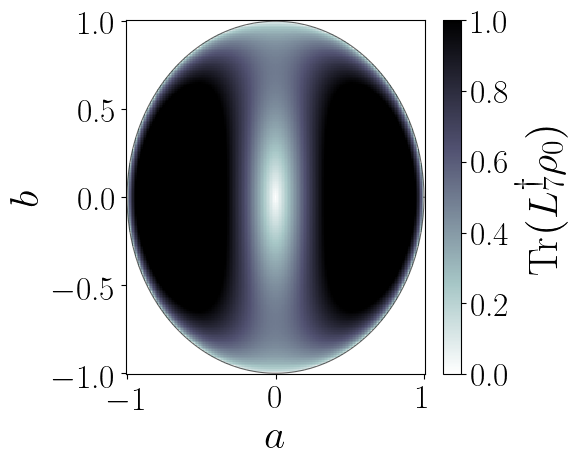

In [693]:
import numpy.ma as ma

# pick which left-eigenvector index to plot k=[0,8]
k = 7
# choose what to plot: 'abs', 'real', 'imag', or 'phase'
plot_kind = 'abs'

# build 2D arrays for plotting
A, B = np.meshgrid(a_grid, b_grid, indexing='xy')   
# results was stored as results[ia, ib, k] where ia indexes a_vals, ib indexes b_vals
Z = data[:, :, k]   # shape (na, nb)

# mask invalid points 
mask = (A**2 + B**2) > 1.0
if plot_kind == 'abs':
    M = np.abs(Z)
elif plot_kind == 'real':
    M = np.real(Z)
elif plot_kind == 'imag':
    M = np.imag(Z)
elif plot_kind == 'phase':
    M = np.angle(Z)
else:
    raise ValueError("plot_kind must be one of 'abs','real','imag','phase'")

Mmasked = ma.array(M, mask=mask)

# plotting
fig, ax = plt.subplots(figsize=(6,5))
# Use pcolormesh so axis ticks correspond to a_vals/b_vals directly
pcm = ax.pcolormesh(a_grid, b_grid, Mmasked.T, shading='auto', cmap="bone_r", vmin=0, vmax=1)  
cb = fig.colorbar(pcm, ax=ax)

cb.set_label(fr"$\mathrm{{Tr}}(L_{{{k}}}^\dagger\rho_0)$")

# draw unit circle boundary
theta = np.linspace(0, 2*np.pi, 400)
ax.plot(np.cos(theta), np.sin(theta), color='k', lw=0.8, alpha=0.6)

ax.set_xlabel(r'$a$')
ax.set_ylabel(r'$b$')
# ax.set_aspect('equal')
plt.tight_layout()
plt.show()

Trotterized time evolution of vectorized $|\rho(t)\rangle\rangle = e^{\mathcal{L}_0t}|\rho(0)\rangle\rangle$, in numpy for time evolution

In [ ]:
from scipy.linalg import expm


# Convert symbolic matrices to numerical functions
def sympy_to_numeric(sympy_expr, params):
    """Convert a SymPy expression to a numerical function"""
    # Extract all symbols from the expression
    symbols = list(sympy_expr.free_symbols)
    
    # Create a lambda function
    func = sp.lambdify(symbols, sympy_expr, 'numpy')
    
    def eval_func(**kwargs):
        # Prepare arguments in the correct order
        args = [kwargs[str(s)] for s in symbols]
        return func(*args)
    
    return eval_func

# Define numerical parameter values
param_values = {
    'Gamma': 1,  'Omega': 1, 'Delta':0
}

# Convert Liouvillian to numerical function
liouv_func = sympy_to_numeric(Liouv, param_values)

# Evaluate Liouvillian numerically
Liouv_num = np.array(liouv_func(**param_values), dtype=complex)

# For Trotterization, we need the Hamiltonian and dissipative parts separately
# Convert Ham_super and Diss_super to numerical functions
ham_func = sympy_to_numeric(Ham_super, param_values)
diss_func = sympy_to_numeric(Diss_super, param_values)

# Evaluate them numerically
H_super_num = np.array(ham_func(**param_values), dtype=complex)
D_super_num = np.array(diss_func(**param_values), dtype=complex)

# Initial density matrix
a = 0.25
b = 0.5
c = np.sqrt(1-a**2-b**2)
psi = np.array([a, b, c], dtype=complex)
# normalize 
nrm = np.linalg.norm(psi)
if nrm == 0:
    rho = np.zeros((3,3), dtype=complex)
else:
    psi /= nrm
    rho = np.outer(psi, psi.conj())    # |psi><psi|

# Time parameters
T = 10.0  
dt = 0.01  
n_steps = int(T / dt)
time_points = np.linspace(0, T, n_steps + 1)  

# Initialize arrays to store populations
populations = np.zeros((n_steps + 1, 3))  # For r11, r22, r33

# Store initial populations
rho_current = rho.copy()
populations[0, :] = np.diag(rho_current).real  # Populations are real

# Precompute exponential operators for Trotter steps
U_ham = expm(H_super_num * dt)       
U_diss = expm(D_super_num * dt)     
U_diss_half = expm(D_super_num * dt/2) 

# Symmetric Trotter-Suzuki step
U_step = U_diss_half @ U_ham @ U_diss_half

# Evolve the state and track populations
vec_rho = rho0.flatten('F')  # Vectorize initial state
for i in range(1, n_steps + 1):
    # Apply Trotter step
    vec_rho = U_step @ vec_rho
    
    # Reshape back to density matrix
    rho_current = vec_rho.reshape(3, 3, order='F')
    
    # Store populations (diagonal elements)
    populations[i, :] = np.diag(rho_current).real

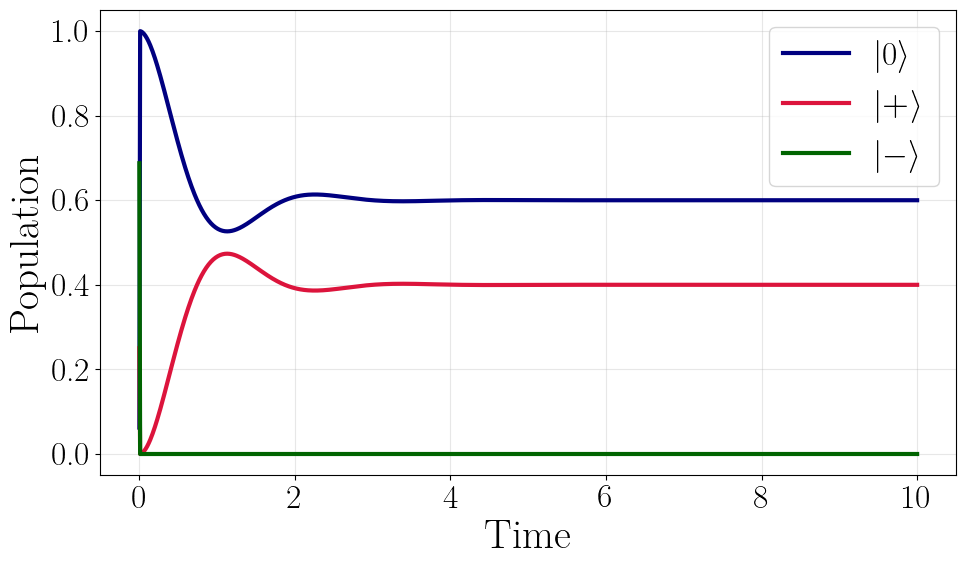

In [733]:
plt.figure(figsize=(10, 6))
plt.plot(time_points, populations[:, 0], label=r'$|0\rangle$', linewidth=3, color='navy')
plt.plot(time_points, populations[:, 1], label=r'$|+\rangle$', linewidth=3, color='crimson')
plt.plot(time_points, populations[:, 2], label=r'$|-\rangle$', linewidth=3, color='darkgreen')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
